# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment, you will be able to :

* obtain the mfcc features from audio samples 
* train the classifier with these mfcc features
* classify the audio samples into 'yes' and 'no'

In [1]:
#@title Experiment Walkthrough Video
#@markdwon Speech Yes-No classifier MLP

from IPython.display import HTML

HTML("""<video width="420" height="240" controls>
<source src="https://cdn.talentsprint.com/talentsprint/archives/sc/aiml/aiml_2018_b7_hyd/experiment_details_backup/yes_no_classifier.mp4" type="video/mp4">
</video>""")

## Dataset 

### Description
The dataset used in the experiment contains 2661 audio samples with the extension .wav. 

Each audio sample has utterances 'yes' or 'no'

The naming convention of the sample is of the format 'yes_no/' followed by '10' (representing 'yes') or '11' (representing 'no')

Ex:   

        'yes_no/10_g38_46.wav'    ---> yes audio sample
        'yes_no/11_G6_11.wav'     ---> no audio sample



## Domain Information

When we listen to an audio sample it changes constantly. This means that speech is non-stationary signal. Therefore, normal signal processing techniques cannot be applied to get features from audio. However, if the speech signal is observed using a very small duration window, the speech content in that small duration appears to be  stationary. That brought in the concept of short-time processing of speech. 

MFCC is a techique for short-time processing of speech. 

**Note: While it is a bonus to understand 'how' a speech signal is converted to a 'representation' by MFCC (or other similar speech processing techniques), it is not mandatory to understand the same. It is sufficient to realize that you're generating a unique numeric representation (a set of numbers) of a speech signal and that this unique representation helps you run your machine learning algorithms over the samples.**

## AIML Technique

In this short-time processing technique MFCC, a small duration window (say 25 milli sec) is considered for processing of the audio samples at a time. This small duration is called a frame. Now, for each of the frames, MFCC features are computed which give a compact representation of the audio samples. A spectogram is computed for audio samples which gives a heat map of frequencies vs time from the series of spectral vectors generated from audio samples.

This representation is obtained by keeping in mind that humans are much better at grasping small changes in the audio at low frequencies than audio at high frequencies. So mel-scale converts high frequencies to human graspable frequencies. 

## Setup Steps

In [3]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}

In [6]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}

In [5]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "U2W10_18_Yes_No_Classifier_Speech_C" #name of the notebook

def setup(): 
    from IPython.display import HTML, display
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/yes_no.zip")
    ipython.magic("sx unzip yes_no.zip")
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing Required Packages

In [7]:
import os

import warnings
warnings.filterwarnings("ignore")

# Math
import numpy as np
from scipy import signal
from scipy.io import wavfile
import librosa

# Visualization
import matplotlib.pyplot as plt
import librosa.display

# Import glob to perform pattern matching to find files
import glob

# Import train_test_split to split the data into train and test sets
from sklearn.model_selection import train_test_split

# Import MLPClassifier to be trained on features of wav files
from sklearn.neural_network import MLPClassifier

#### About glob.iglob:

The glob library  provides methods for traversing the file system and returning files that matched a defined set of glob patterns. Here it helps traverse file name matching the ".wav" pattern

**Note:** Refer to  [glob.iglob](https://docs.python.org/3/library/glob.html)

In [8]:
labels = []
wave_files = []
for filename in glob.iglob('yes_no/*.wav', recursive=True):
  # Store the labels of each wav file in a list
  labels.append(int((filename.split("/")[-1]).split("_")[0])) # split the file name to get the labels of the audio files
  # Store the wav files in a list
  wave_files.append(filename)

In [15]:
# Check the length of wav files
len(wave_files)

2661

Below is the function for loading the wavefile and extracting the melspectogram features at a sample rate

In [9]:
def get_melspectrogram_features(filename):
    y, sr = librosa.load(filename)
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
    log_S = librosa.power_to_db(S, ref=np.max)
    return log_S,sr

Let us try to extract the features for one of the wave file and plot the melspectrogram 


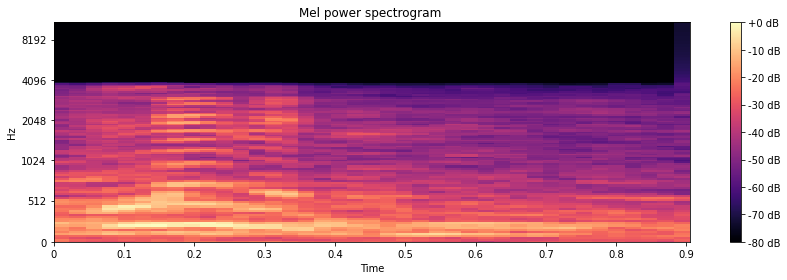

In [10]:
features,sr = get_melspectrogram_features(wave_files[1])
plt.figure(figsize=(12, 4))
librosa.display.specshow(features, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()


### Extract the MFCC features for all Audio files

Convert the audio files to Melspectrogram and obtain mfcc features


* Load the audio files using [librosa.load](http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/generated/librosa.core.load.html)


*   Convert the audo files to Melspectrogram using STFT (Short term fourier transform). Refer to [Librosa core stft](https://librosa.org/doc/0.7.2/generated/librosa.core.stft.html)

*  Get the melspectogram features using a pre-computed power spectrogram and convert to decibels. 
    - Refer to [melspectogram features with n_mels = 128](https://librosa.org/doc/latest/generated/librosa.feature.melspectrogram.html)

    - Refer to [librosa.power_to_db](http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/generated/librosa.core.power_to_db.html)

*  Use the features obtained from melspectogram as input to MFCC and return features. Refer to [librosa.feature.mfcc](https://librosa.org/doc/0.7.2/generated/librosa.feature.mfcc.html)  

In [11]:
n_mels = 128 # melspectogram features
n_mfcc = 30  # mfcc features

Since our ear cannot response to very fast change of speech data, we normally cut the speech data into frames before analysis.

In [12]:
# Extract MFCC features 
'''
Get the MFCC features with frame size 15  
The mfcc features are then passed to delta which perform 2nd order differentiation
Delta is applied at each frame to get variance between frames
Function returns mfcc features and 2nd order differentiated mfcc features
'''
def get_mfcc_features(filename):
    frames = 15          # frame size is 15
    y, sr = librosa.load(filename)
    D = np.abs(librosa.stft(y))**2
    S = librosa.feature.melspectrogram(S=D)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    log_S = librosa.power_to_db(S,ref=np.max)
    features = librosa.feature.mfcc(S=log_S, n_mfcc=30)
    if features.shape[1] < frames :
        features = np.hstack((features, np.zeros((n_mfcc, frames - features.shape[1]))))
    elif features.shape[1] > frames:
        features = features[:, :frames]
    delta2_mfcc = librosa.feature.delta(features, order=2)
    return features,delta2_mfcc

### Let us try to calculate mfcc features for one sample and try to visualize those features


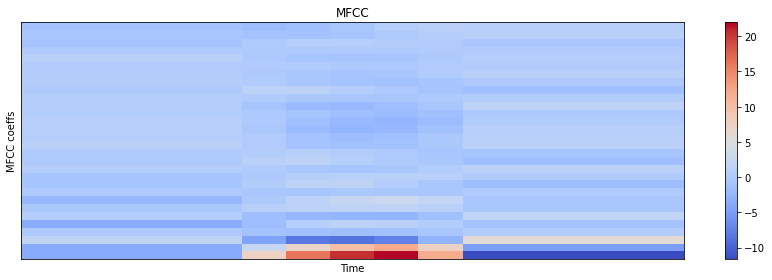

In [13]:
mfcc_features, delta2_mfcc = get_mfcc_features(wave_files[3])
plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

### Extracting mfcc features for all the samples

In [14]:
features = []                  # It takes some time to run this cell
for filename in wave_files:
    fea, delta_2 = get_mfcc_features(filename)
    features.append(fea)

In [16]:
# Check the shape of the features
features[0].shape

(30, 15)

### Split the mfcc features into train and test sets with 90-10 split 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, np.array(labels), test_size = 0.1)

Get the length of the train and test data

In [18]:
len(X_train), len(X_test), len(y_train), len(y_test)

(2394, 267, 2394, 267)

In [19]:
# Convert the X_train to an array and reshape from 2394*30*15 to 2394*450

X_train = np.array(X_train)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] *  X_train.shape[2])

# Convert the X_test to an array and reshape from 267*30*15 to 267*450

X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] *  X_test.shape[2])

In [20]:
# Check the shape of X_train
X_train.shape

(2394, 450)

### Apply MLP classifier on the MFCC features

**Note:** Refer to [MLP Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) from sklearn

In [21]:
# Create a object for MLPClassifier 
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(15,10,5))

In [22]:
# Fit the train fetaures and labels to the classifier object
clf.fit(np.array(X_train), np.array(y_train))  

# Predict the labels of the test features
predicted_values = clf.predict(X_test)  

In [23]:
# Get the accuracy score by comparing predicted labels and test labels
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predicted_values)

0.5655430711610487

Tune the hyperparameters of MLP to get the better accuracy

#### Please answer the questions below to complete the experiment:

In [24]:
#@title 'Sampling rate' of the audio file is one of the input parameters of the MLPClassifier (of SKlearn) that is used above? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "FALSE" #@param ["","TRUE","FALSE"]


In [25]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [26]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "non" #@param {type:"string"}


In [27]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [28]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [29]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [30]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [31]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 9540
Date of submission:  11 Nov 2020
Time of submission:  18:19:00
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
